In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('4163.csv')

In [7]:
# look at first 5 rows
df.head()

,id,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
0,1,65,1,0,0,1,1,56.0,162.1,21.31,...,0,0,0,0,0,1,0,0,0,1
1,3,66,1,0,1,0,1,83.9,162.5,31.77,...,0,0,0,0,0,1,0,0,1,0
2,4,54,1,1,0,0,1,69.4,160.5,26.94,...,0,0,0,0,0,1,0,1,0,0
3,6,26,0,1,0,0,1,119.3,193.2,31.96,...,0,0,0,0,0,1,0,1,0,0
4,7,66,0,1,0,0,0,85.1,172.1,28.73,...,0,0,1,0,0,0,0,1,0,0


In [5]:
# dimension of datase
df.shape

(4136, 39)

In [8]:
# data type of each col
df.dtypes

id                     int64
Age                    int64
Female                 int64
Educ                   int64
Unmarried              int64
Income                 int64
Insured                int64
Weight               float64
Height               float64
BMI                  float64
Obese                  int64
Waist                float64
SBP                    int64
DBP                    int64
HDL                    int64
LDL                    int64
Total.Chol             int64
Dyslipidemia           int64
PVD                    int64
Activity               int64
PoorVision             int64
Smoker                 int64
Hypertension           int64
Fam.Hypertension       int64
Diabetes               int64
Fam.Diabetes           int64
Stroke                 int64
CVD                    int64
Fam.CVD                int64
CHF                    int64
Anemia                 int64
CKD                    int64
Racegrpblack           int64
Racegrphispa           int64
Racegrpother  

In [9]:
# check missing value proportion of each col
df.isnull().mean()

id                   0.0
Age                  0.0
Female               0.0
Educ                 0.0
Unmarried            0.0
Income               0.0
Insured              0.0
Weight               0.0
Height               0.0
BMI                  0.0
Obese                0.0
Waist                0.0
SBP                  0.0
DBP                  0.0
HDL                  0.0
LDL                  0.0
Total.Chol           0.0
Dyslipidemia         0.0
PVD                  0.0
Activity             0.0
PoorVision           0.0
Smoker               0.0
Hypertension         0.0
Fam.Hypertension     0.0
Diabetes             0.0
Fam.Diabetes         0.0
Stroke               0.0
CVD                  0.0
Fam.CVD              0.0
CHF                  0.0
Anemia               0.0
CKD                  0.0
Racegrpblack         0.0
Racegrphispa         0.0
Racegrpother         0.0
Racegrpwhite         0.0
CareSourceclinic     0.0
CareSourceDrHMO      0.0
CareSourcenoplace    0.0
CareSourceother      0.0


In [10]:
#check each col's # of unique value to see which feature is not dummy variable
col=df.columns
for entry in col:
        print(entry+':'+ str(len(df[entry].unique())))

id:4136
Age:66
Female:2
Educ:2
Unmarried:2
Income:2
Insured:2
Weight:928
Height:489
BMI:1870
Obese:2
Waist:708
SBP:127
DBP:94
HDL:102
LDL:249
Total.Chol:249
Dyslipidemia:2
PVD:2
Activity:4
PoorVision:2
Smoker:2
Hypertension:2
Fam.Hypertension:2
Diabetes:2
Fam.Diabetes:2
Stroke:2
CVD:2
Fam.CVD:2
CHF:2
Anemia:2
CKD:2
Racegrpblack:2
Racegrphispa:2
Racegrpother:2
Racegrpwhite:2
CareSourceclinic:2
CareSourceDrHMO:2
CareSourcenoplace:2
CareSourceother:2


In [7]:
# drop id column 
df=df.drop(['id'],axis=1)

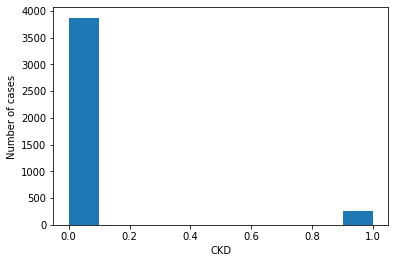

In [73]:
# EDA
df.CKD.plot(kind='hist')
plt.xlabel('CKD')
plt.ylabel('Number of cases')
plt.show()

In [75]:
# proportion of ckd cases
(df.CKD==1).sum()/(df.CKD==0).sum()

0.06873385012919897

# feature engineer

In [64]:
# encoding 'activity' into dummy
df['new_Activity']=df['Activity'].apply(lambda val: 1 if val>2 else 0)

In [70]:
df.new_Activity.unique()

array([1, 0])

In [68]:
# filter non_dummy features
col_non_dummy=[]
for entry in df.columns:
    if len(df[entry].unique())>2:
        col_non_dummy.append(entry)

In [69]:
col_non_dummy

['Age',
 'Weight',
 'Height',
 'BMI',
 'Waist',
 'SBP',
 'DBP',
 'HDL',
 'LDL',
 'Total.Chol',
 'Activity']

In [71]:
# remove 'activity' from col_non_dummy list
col_non_dummy.remove('Activity')

In [72]:
col_non_dummy

['Age',
 'Weight',
 'Height',
 'BMI',
 'Waist',
 'SBP',
 'DBP',
 'HDL',
 'LDL',
 'Total.Chol']

In [76]:
# get median value of all the non_dummy features, 'activity is categorical variable'
df[col_non_dummy].median()

Age            46.000
Weight         77.400
Height        167.450
BMI            27.295
Waist          96.500
SBP           121.000
DBP            72.000
HDL            49.000
LDL           149.000
Total.Chol    200.000
dtype: float64

In [80]:
# create dummy
for col in col_non_dummy:
    df['new_'+col]=pd.qcut(df[col],q=2,labels=[0,1])

In [81]:
df.head()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,...,new_Age,new_Weight,new_Height,new_BMI,new_Waist,new_SBP,new_DBP,new_HDL,new_LDL,new_Total.Chol
0,65,1,0,0,1,1,56.0,162.1,21.31,0,...,1,0,0,0,0,1,0,0,1,1
1,66,1,0,1,0,1,83.9,162.5,31.77,1,...,1,1,0,1,1,0,0,0,1,1
2,54,1,1,0,0,1,69.4,160.5,26.94,0,...,1,0,0,0,0,0,0,1,1,1
3,26,0,1,0,0,1,119.3,193.2,31.96,1,...,0,1,1,1,1,1,0,0,1,1
4,66,0,1,0,0,0,85.1,172.1,28.73,0,...,1,1,1,1,1,1,1,0,0,0


In [82]:
df.shape

(4136, 50)

In [83]:
# look at data type, these new dummy features are categorical variable, we need to transform them into float or int
df.dtypes

Age                     int64
Female                  int64
Educ                    int64
Unmarried               int64
Income                  int64
Insured                 int64
Weight                float64
Height                float64
BMI                   float64
Obese                   int64
Waist                 float64
SBP                     int64
DBP                     int64
HDL                     int64
LDL                     int64
Total.Chol              int64
Dyslipidemia            int64
PVD                     int64
Activity                int64
PoorVision              int64
Smoker                  int64
Hypertension            int64
Fam.Hypertension        int64
Diabetes                int64
Fam.Diabetes            int64
Stroke                  int64
CVD                     int64
Fam.CVD                 int64
CHF                     int64
Anemia                  int64
CKD                     int64
Racegrpblack            int64
Racegrphispa            int64
Racegrpoth

In [88]:
# drop original col to create a new dummy dataframe
df_dummy=df.drop(col_non_dummy+['Activity'],axis=1)
df_dummy.head()

,Female,Educ,Unmarried,Income,Insured,Obese,Dyslipidemia,PVD,PoorVision,Smoker,...,new_Age,new_Weight,new_Height,new_BMI,new_Waist,new_SBP,new_DBP,new_HDL,new_LDL,new_Total.Chol
0,1,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,1,1,0,0,1,...,1,1,0,1,1,0,0,0,1,1
2,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
3,0,1,0,0,1,1,0,0,0,0,...,0,1,1,1,1,1,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0


In [91]:
# confirm every features are dummy variable
for entry in df_dummy.columns:
        print(entry+':'+ str(len(df[entry].unique())))

Female:2
Educ:2
Unmarried:2
Income:2
Insured:2
Obese:2
Dyslipidemia:2
PVD:2
PoorVision:2
Smoker:2
Hypertension:2
Fam.Hypertension:2
Diabetes:2
Fam.Diabetes:2
Stroke:2
CVD:2
Fam.CVD:2
CHF:2
Anemia:2
CKD:2
Racegrpblack:2
Racegrphispa:2
Racegrpother:2
Racegrpwhite:2
CareSourceclinic:2
CareSourceDrHMO:2
CareSourcenoplace:2
CareSourceother:2
new_Activity:2
new_Age:2
new_Weight:2
new_Height:2
new_BMI:2
new_Waist:2
new_SBP:2
new_DBP:2
new_HDL:2
new_LDL:2
new_Total.Chol:2


In [109]:
df_dummy=df_dummy.astype('int')
df_dummy.dtypes

Female               int64
Educ                 int64
Unmarried            int64
Income               int64
Insured              int64
Obese                int64
Dyslipidemia         int64
PVD                  int64
PoorVision           int64
Smoker               int64
Hypertension         int64
Fam.Hypertension     int64
Diabetes             int64
Fam.Diabetes         int64
Stroke               int64
CVD                  int64
Fam.CVD              int64
CHF                  int64
Anemia               int64
CKD                  int64
Racegrpblack         int64
Racegrphispa         int64
Racegrpother         int64
Racegrpwhite         int64
CareSourceclinic     int64
CareSourceDrHMO      int64
CareSourcenoplace    int64
CareSourceother      int64
new_Activity         int64
new_Age              int64
new_Weight           int64
new_Height           int64
new_BMI              int64
new_Waist            int64
new_SBP              int64
new_DBP              int64
new_HDL              int64
n

# feature filter

In [112]:
# filter CKD==1 and drop CKD Col
ckd=df_dummy[df_dummy.CKD==1].drop(['CKD'],axis=1)

In [121]:
prob_ckd=[]
for col in ckd.columns:
    prob_ckd.append(ckd[col].mean())
    df_prob_ckd=pd.DataFrame(zip(ckd.columns,prob_ckd))

In [140]:
df_prob_ckd.columns=['features','likelihood_ckd']

In [141]:
df_prob_ckd

,features,likelihood_ckd
0,Female,0.537594
1,Educ,0.349624
2,Unmarried,0.439850
3,Income,0.281955
4,Insured,0.966165
5,Obese,0.349624
6,Dyslipidemia,0.105263
7,PVD,0.142857
8,PoorVision,0.139098
9,Smoker,0.398496


In [124]:
pro_feature=[]
for col in df_dummy.columns:
    prob=df_dummy[df_dummy[col]==1].CKD.mean()
    pro_feature.append(prob)
    df_pro_feature=pd.DataFrame(zip(df_dummy.columns,pro_feature))
        

In [142]:
df_pro_feature.columns=['features','likelihood_feature']

In [143]:
df_pro_feature

,features,likelihood_feature
0,Female,0.066948
1,Educ,0.047595
2,Unmarried,0.081306
3,Income,0.040628
4,Insured,0.076694
5,Obese,0.072543
6,Dyslipidemia,0.065268
7,PVD,0.269504
8,PoorVision,0.166667
9,Smoker,0.083927


In [146]:
df_prob=pd.merge(left=df_prob_ckd,right=df_pro_feature,on='features')

In [147]:
df_prob

,features,likelihood_ckd,likelihood_feature
0,Female,0.537594,0.066948
1,Educ,0.349624,0.047595
2,Unmarried,0.439850,0.081306
3,Income,0.281955,0.040628
4,Insured,0.966165,0.076694
5,Obese,0.349624,0.072543
6,Dyslipidemia,0.105263,0.065268
7,PVD,0.142857,0.269504
8,PoorVision,0.139098,0.166667
9,Smoker,0.398496,0.083927


In [152]:
df_prob['likelihood_combine']=df_prob['likelihood_ckd']*df_prob['likelihood_feature']

In [160]:
# look at first highest prob 15 features 
df_prob.sort_values('likelihood_feature',ascending=False)[0:15][['features','likelihood_feature']]

,features,likelihood_feature
14,Stroke,0.297030
7,PVD,0.269504
15,CVD,0.262931
17,CHF,0.250000
12,Diabetes,0.176334
8,PoorVision,0.166667
10,Hypertension,0.134824
28,new_Age,0.126754
18,Anemia,0.102564
33,new_SBP,0.101435


In [168]:
# look at first highest prob 15 features 
df_prob.sort_values('likelihood_combine',ascending=False)[0:15][['features','likelihood_combine']]

,features,likelihood_combine
28,new_Age,0.120559
10,Hypertension,0.106947
33,new_SBP,0.078174
4,Insured,0.074099
22,Racegrpwhite,0.060369
15,CVD,0.060296
32,new_Waist,0.055252
24,CareSourceDrHMO,0.054656
12,Diabetes,0.050381
36,new_LDL,0.038632


In [169]:
# get feature names for modeling
fea_prob_col=list(df_prob.sort_values('likelihood_feature',ascending=False)[0:15]['features'])
fea_prob_col

['Stroke',
 'PVD',
 'CVD',
 'CHF',
 'Diabetes',
 'PoorVision',
 'Hypertension',
 'new_Age',
 'Anemia',
 'new_SBP',
 'Racegrpwhite',
 'new_Waist',
 'Smoker',
 'Unmarried',
 'CareSourceDrHMO']

In [170]:
# get feature names for modeling, they are in Dec order
comb_prob_col=list(df_prob.sort_values('likelihood_combine',ascending=False)[0:15]['features'])
comb_prob_col

['new_Age',
 'Hypertension',
 'new_SBP',
 'Insured',
 'Racegrpwhite',
 'CVD',
 'new_Waist',
 'CareSourceDrHMO',
 'Diabetes',
 'new_LDL',
 'PVD',
 'new_BMI',
 'Female',
 'Unmarried',
 'new_Weight']

In [174]:
# get common features for modeling, they are in Dec order
common_col=list(set(comb_prob_col) & set(fea_prob_col))
common_col

['Hypertension',
 'CareSourceDrHMO',
 'new_SBP',
 'new_Age',
 'new_Waist',
 'Unmarried',
 'Racegrpwhite',
 'PVD',
 'Diabetes',
 'CVD']

# continious feature preprocessing (normal distributed & similar variance)

In [8]:
#load original data
df_original=pd.read_csv('4163.csv')

In [176]:
#have a look at first 5 rows
df_original.head()

,id,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
0,1,65,1,0,0,1,1,56.0,162.1,21.31,...,0,0,0,0,0,1,0,0,0,1
1,3,66,1,0,1,0,1,83.9,162.5,31.77,...,0,0,0,0,0,1,0,0,1,0
2,4,54,1,1,0,0,1,69.4,160.5,26.94,...,0,0,0,0,0,1,0,1,0,0
3,6,26,0,1,0,0,1,119.3,193.2,31.96,...,0,0,0,0,0,1,0,1,0,0
4,7,66,0,1,0,0,0,85.1,172.1,28.73,...,0,0,1,0,0,0,0,1,0,0


In [9]:
# remove id
df_original=df_original.drop('id',axis=1)

In [180]:
# look at the variance of each col, some of them have a very high variance
df_original.var()

Age                   330.931916
Female                  0.249790
Educ                    0.249301
Unmarried               0.226927
Income                  0.247179
Insured                 0.153811
Weight                368.011677
Height                100.421709
BMI                    37.317719
Obese                   0.213937
Waist                 229.725963
SBP                   401.445712
DBP                   147.855385
HDL                   246.894918
LDL                  1787.429386
Total.Chol           1765.527074
Dyslipidemia            0.092987
PVD                     0.032937
Activity                0.646629
PoorVision              0.050806
Smoker                  0.212169
Hypertension            0.235267
Fam.Hypertension        0.189107
Diabetes                0.093370
Fam.Diabetes            0.215212
Stroke                  0.023829
CVD                     0.052959
Fam.CVD                 0.229290
CHF                     0.021754
Anemia                  0.018508
CKD       

In [11]:
#filter continious columns
conti_col=df_original.columns[df_original.var()>1]
conti_col

Index(['Age', 'Weight', 'Height', 'BMI', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL',
       'Total.Chol'],
      dtype='object')

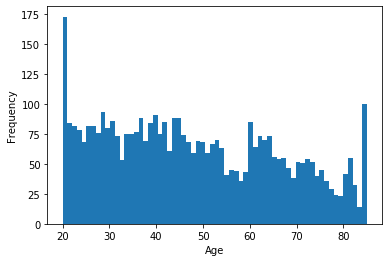

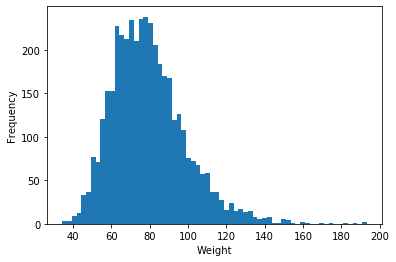

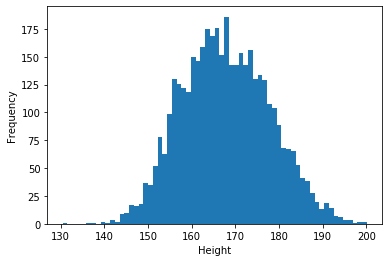

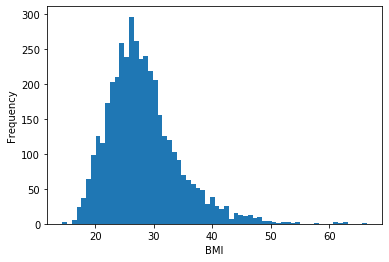

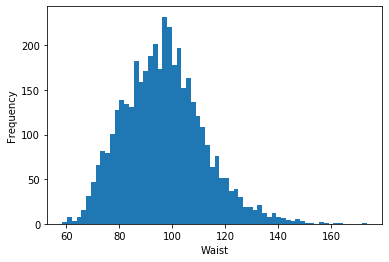

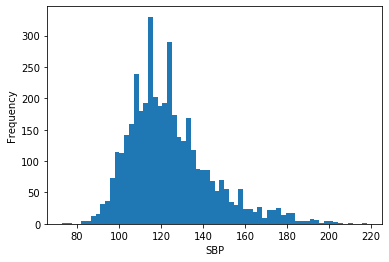

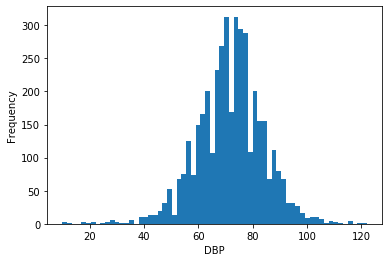

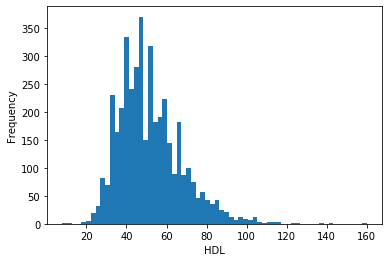

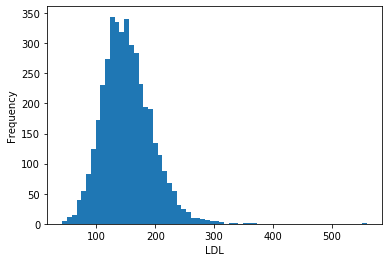

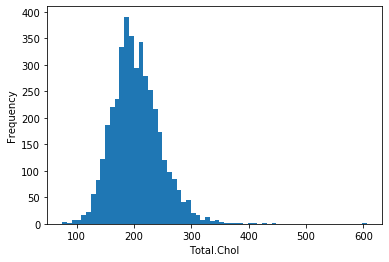

In [244]:
# take a look at all the conti features' distribution
# bins = sqrt of sample size
bins=int(round(np.sqrt(df_original.shape[0]))) #64
for col in conti_col:
    df_original[col].plot(kind='hist',bins=bins)
    plt.xlabel(col)
    plt.show()

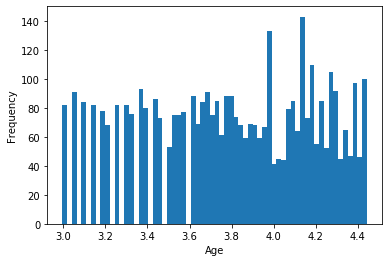

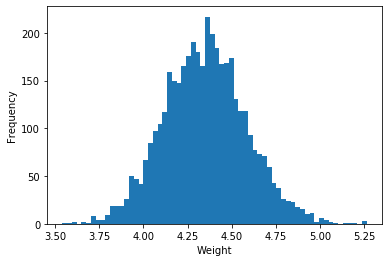

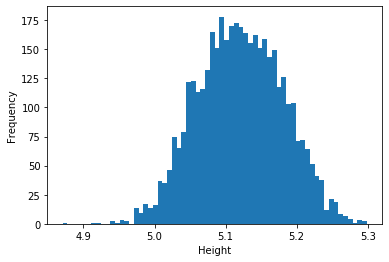

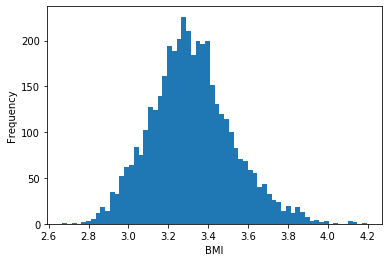

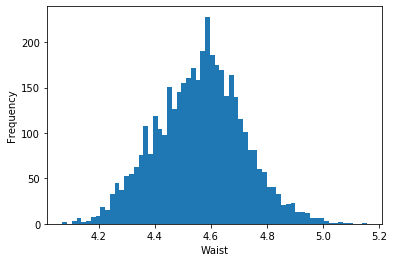

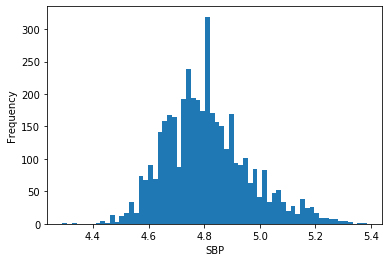

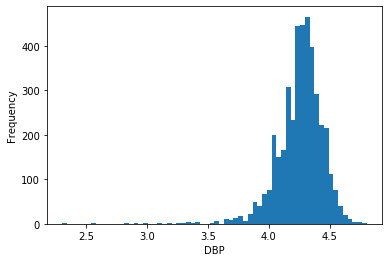

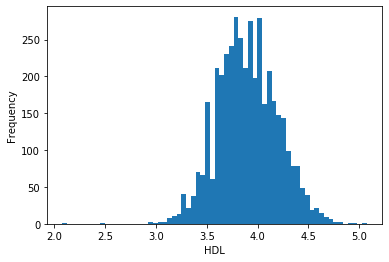

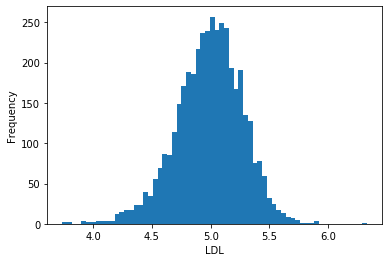

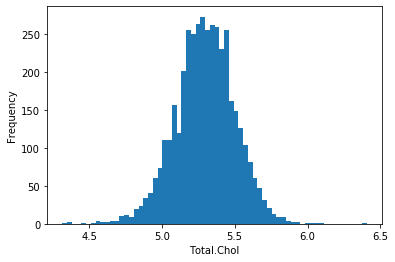

In [245]:
# log these features and see again, they are better and normally distributed, we can log them and std them
for col in conti_col:
    np.log(df_original[col]).plot(kind='hist',bins=64)
    plt.xlabel(col)
    plt.show()

In [13]:
# copy df_original and logrithm continous features 
df_log=df_original.copy()
df_log[conti_col]=np.log(df_log[conti_col])

In [14]:
# take a look to confirm they are loged
df_log[conti_col].head()

,Age,Weight,Height,BMI,Waist,SBP,DBP,HDL,LDL,Total.Chol
0,4.174387,4.025352,5.088213,3.059176,4.426044,4.905275,4.262680,3.871201,5.517453,5.693732
1,4.189655,4.429626,5.090678,3.458522,4.729156,4.744932,4.043051,3.784190,5.351858,5.541264
2,3.988984,4.239887,5.078294,3.293612,4.355426,4.700480,4.043051,4.304065,5.049856,5.438079
3,3.258097,4.781641,5.263726,3.464485,4.769837,4.859812,4.248495,3.761200,5.068904,5.308268
4,4.189655,4.443827,5.148076,3.357942,4.597138,4.919981,4.521789,3.713572,4.962845,5.214936


In [255]:
# look at their variance, maybe we can standardize them, so that they will have the same variance
df_log[conti_col].var()

Age           0.161864
Weight        0.054611
Height        0.003567
BMI           0.042287
Waist         0.024150
SBP           0.023458
DBP           0.035502
HDL           0.086697
LDL           0.079759
Total.Chol    0.042197
dtype: float64

In [15]:
# first split data into training and test, since we cannot standardize the whole data at the same time 
y=df_log.CKD
X=df_log.drop('CKD',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y,test_size=0.2, random_state=42)   #'stratify=y' means stratified sampling
                                                       # random_state ~ fix the training and test data

In [16]:
# standardize continous features
X_train_std=X_train.copy()
X_test_std=X_test.copy()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train[conti_col]) #don't cheat, fit on X_train then applied the same transformation on X_test
X_train_std[conti_col]=scaler.transform(X_train[conti_col]) #transform into dataframe
X_test_std[conti_col]=scaler.transform(X_test[conti_col])

In [278]:
# every continious features have the same std in the training data set
X_train_std.std().sort_values(ascending=False)

SBP                  1.000151
Waist                1.000151
LDL                  1.000151
Total.Chol           1.000151
HDL                  1.000151
Height               1.000151
BMI                  1.000151
Age                  1.000151
Weight               1.000151
DBP                  1.000151
Activity             0.810983
Female               0.499628
Educ                 0.499335
Racegrpwhite         0.498780
Income               0.496972
CareSourceDrHMO      0.490627
Hypertension         0.484776
Fam.CVD              0.480954
Unmarried            0.475611
Obese                0.464584
Fam.Diabetes         0.462875
Smoker               0.460100
Racegrphispa         0.443530
Fam.Hypertension     0.439511
CareSourceclinic     0.405924
Insured              0.390794
Racegrpblack         0.371830
CareSourcenoplace    0.355578
Diabetes             0.307633
Dyslipidemia         0.305294
CVD                  0.229226
PoorVision           0.222660
CareSourceother      0.211363
PVD       

In [308]:
# in test data, they have different variance since we use the std and mean of training data to standardize test
X_test_std.var().sort_values(ascending=False)

Age                  1.046209
HDL                  1.017569
SBP                  0.997548
BMI                  0.981009
Weight               0.979769
Total.Chol           0.971326
DBP                  0.969712
Waist                0.964973
LDL                  0.936125
Height               0.933164
Activity             0.602859
Female               0.250296
Racegrpwhite         0.250016
Educ                 0.249461
Income               0.248194
CareSourceDrHMO      0.243349
Hypertension         0.236562
Unmarried            0.229968
Fam.CVD              0.220439
Fam.Diabetes         0.219173
Smoker               0.214306
Racegrphispa         0.206088
Obese                0.206088
Fam.Hypertension     0.171699
CareSourceclinic     0.166884
Insured              0.158297
Racegrpblack         0.134990
CareSourcenoplace    0.133342
Dyslipidemia         0.092230
Diabetes             0.088363
PoorVision           0.055744
CVD                  0.054676
CareSourceother      0.043840
Racegrpoth

In [17]:
# Try to Normalize continous features and 'Activity' into range (1,0), 
# so that all the features are in the same range, 
# and the effect of variance difference will be be very minor
X_train_norm=X_train.copy()
X_test_norm=X_test.copy()

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train[list(conti_col)+['Activity']]) 
X_train_norm[list(conti_col)+['Activity']]=scaler.transform(X_train[list(conti_col)+['Activity']]) 
X_test_norm[list(conti_col)+['Activity']]=scaler.transform(X_test[list(conti_col)+['Activity']])

In [18]:
# in the training dataset, the variance differences among different features are very minor
X_train_norm.var().sort_values(ascending=False)

Female               0.249628
Educ                 0.249335
Racegrpwhite         0.248781
Income               0.246981
CareSourceDrHMO      0.240715
Hypertension         0.235008
Fam.CVD              0.231317
Unmarried            0.226206
Obese                0.215838
Fam.Diabetes         0.214254
Smoker               0.211692
Racegrphispa         0.196719
Fam.Hypertension     0.193170
CareSourceclinic     0.164775
Insured              0.152720
Racegrpblack         0.138258
CareSourcenoplace    0.126435
Diabetes             0.094638
Dyslipidemia         0.093205
Age                  0.076623
Activity             0.073077
CVD                  0.052545
PoorVision           0.049577
CareSourceother      0.044674
PVD                  0.034690
Racegrpother         0.028472
Stroke               0.024181
CHF                  0.021587
Waist                0.020668
Height               0.019858
SBP                  0.019614
Weight               0.018464
BMI                  0.018181
Anemia    

In [19]:
# the variance of test data are a little different from of training 
# since we fit test data by the Max, Min, Mean of traing data
X_test_norm.var().sort_values(ascending=False)

Female               0.250296
Racegrpwhite         0.250016
Educ                 0.249461
Income               0.248194
CareSourceDrHMO      0.243349
Hypertension         0.236562
Unmarried            0.229968
Fam.CVD              0.220439
Fam.Diabetes         0.219173
Smoker               0.214306
Racegrphispa         0.206088
Obese                0.206088
Fam.Hypertension     0.171699
CareSourceclinic     0.166884
Insured              0.158297
Racegrpblack         0.134990
CareSourcenoplace    0.133342
Dyslipidemia         0.092230
Diabetes             0.088363
Age                  0.080139
Activity             0.066984
PoorVision           0.055744
CVD                  0.054676
CareSourceother      0.043840
Racegrpother         0.031584
PVD                  0.025895
Anemia               0.023600
Stroke               0.022447
CHF                  0.022447
Waist                0.019938
SBP                  0.019560
Height               0.018525
Weight               0.018085
BMI       

# Feature Selection Based on Different Preprocessing Methods

In [ ]:
######## features for modeling. 
####### We can also use 'conditional prob1'/'conditional prob2' to feilter the features, be innovative
# 1.fea_prob_col
# 2.comb_prob_col
# 3.common_col

########## data for modeling
# LOG:  X_train        X_test
# STD:  X_train_std   X_test_std
# NORM: X_train_norm  X_test_norm

In [321]:
### we always use y_train for training 
y_train

3406    0
1750    0
2305    0
523     0
3961    0
       ..
2388    0
1947    0
1765    0
4110    0
1167    0
Name: CKD, Length: 3308, dtype: int64

In [316]:
# we always use y_test for testing
y_test

2173    0
863     0
3860    0
167     0
3138    0
       ..
2724    0
2478    0
2219    0
384     0
2554    1
Name: CKD, Length: 828, dtype: int64

In [391]:
fea_prob_col_ori=['Stroke','PVD','CVD','CHF','Diabetes','PoorVision','Hypertension',
 'Age','Anemia','SBP','Racegrpwhite','Waist','Smoker','Unmarried','CareSourceDrHMO']

In [393]:
comb_prob_col_ori=['Age','Hypertension','SBP','Insured','Racegrpwhite','CVD',
               'Waist','CareSourceDrHMO','Diabetes','LDL','PVD','BMI','Female','Unmarried','Weight']

In [427]:
common_col_ori=['Hypertension','CareSourceDrHMO','SBP','Age','Waist','Unmarried',
 'Racegrpwhite','PVD','Diabetes','CVD']

# Log

In [407]:
# model (log & fea_prob_col_ori)
import statsmodels.api as sm
x = sm.add_constant(X_train[fea_prob_col_ori]) #fea_prob_col_ori
model = sm.Logit(y_train, x)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.168302
         Iterations 9


In [408]:
# look at the summary of model 
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2954
Time:                        14:20:02   Log-Likelihood:                -556.74
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 5.512e-90
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -21.2620      4.176     -5.092      0.000     -29.446     -13.078
Stroke              0.3117      0.381      0.817      0.414      -0.436       1.059
PVD                 0.7167      

In [421]:
result.pvalues[result.pvalues<0.05]

const           3.542895e-07
PVD             2.481117e-03
Diabetes        9.974692e-03
Hypertension    6.882837e-04
Age             1.481190e-25
Anemia          2.846115e-02
Racegrpwhite    5.855936e-03
dtype: float64

In [20]:
# model features  6 
fea_model=['PVD','Diabetes','Hypertension','Age','Anemia','Racegrpwhite']

In [429]:
# model 2 (log & comb_prob_col_ori)
x = sm.add_constant(X_train[comb_prob_col_ori]) #comb_prob_col_ori
model2 = sm.Logit(y_train, x)
result2 = model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.168135
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2961
Time:                        14:42:53   Log-Likelihood:                -556.19
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 3.222e-90
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -23.8443      4.754     -5.016      0.000     -33.162     -14.527
Age           

In [430]:
result2.pvalues[result2.pvalues<0.05]

const           5.286799e-07
Age             7.730641e-23
Hypertension    6.782026e-04
Racegrpwhite    3.222904e-02
CVD             3.545582e-04
Diabetes        6.178174e-03
PVD             1.676992e-03
Weight          2.645971e-02
dtype: float64

In [21]:
# model 2 features 7
fea_model2=['PVD','Diabetes','Hypertension','Age','CVD','Racegrpwhite','Weight']

In [432]:
# model 3 (log & #common_col_ori)
x = sm.add_constant(X_train[common_col_ori]) #common_col_ori
model3 = sm.Logit(y_train, x)
result3 = model3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.169198
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3297
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2917
Time:                        14:44:07   Log-Likelihood:                -559.71
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 9.377e-93
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -21.0428      4.151     -5.069      0.000     -29.179     -12.907
Hypertension  

In [434]:
result3.pvalues[result3.pvalues<0.05]

const           3.994857e-07
Hypertension    5.841875e-04
Age             3.260760e-26
Unmarried       3.693973e-02
Racegrpwhite    9.664309e-03
PVD             2.169668e-03
Diabetes        8.189741e-03
CVD             6.842679e-04
dtype: float64

In [22]:
# model3 features 7 
fea_model3=['PVD','Diabetes','Hypertension','Age','CVD','Racegrpwhite','Unmarried']

# log + std 

In [435]:
# model4 (log+std & fea_prob_col_ori)
x = sm.add_constant(X_train_std[fea_prob_col_ori]) #fea_prob_col_ori 
model4 = sm.Logit(y_train, x)
result4 = model4.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.168302
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2954
Time:                        14:49:08   Log-Likelihood:                -556.74
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 5.512e-90
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.1492      0.282    -18.264      0.000      -5.702      -4.597
Stroke        

In [436]:
result4.pvalues[result4.pvalues<0.05]

const           1.614607e-74
PVD             2.481117e-03
Diabetes        9.974692e-03
Hypertension    6.882837e-04
Age             1.481190e-25
Anemia          2.846115e-02
Racegrpwhite    5.855936e-03
dtype: float64

In [23]:
fea_model4=['PVD','Diabetes','Hypertension','Age','Anemia','Racegrpwhite']

In [439]:
# model5 (fea_prob_col_ori)
x = sm.add_constant(X_train_std[comb_prob_col_ori]) #comb_prob_col_ori 
model5 = sm.Logit(y_train, x)
result5 = model5.fit()
print(result5.summary())

Optimization terminated successfully.
         Current function value: 0.168135
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2961
Time:                        14:55:40   Log-Likelihood:                -556.19
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 3.222e-90
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.6233      0.432    -13.011      0.000      -6.470      -4.776
Age           

In [440]:
result5.pvalues[result5.pvalues<0.05]

const           1.061086e-38
Age             7.730641e-23
Hypertension    6.782026e-04
Racegrpwhite    3.222904e-02
CVD             3.545582e-04
Diabetes        6.178174e-03
PVD             1.676992e-03
Weight          2.645971e-02
dtype: float64

In [24]:
fea_model5=['CVD','PVD','Diabetes','Hypertension','Age','Racegrpwhite','Weight']

In [443]:
# model5 (fea_prob_col_ori)
x = sm.add_constant(X_train_std[common_col_ori]) #common_col_ori
model6 = sm.Logit(y_train, x)
result6 = model6.fit()
print(result6.summary())

Optimization terminated successfully.
         Current function value: 0.169198
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3297
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2917
Time:                        15:29:57   Log-Likelihood:                -559.71
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 9.377e-93
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.1291      0.276    -18.611      0.000      -5.669      -4.589
Hypertension  

In [445]:
result6.pvalues[result6.pvalues<0.05]

const           2.604986e-77
Hypertension    5.841875e-04
Age             3.260760e-26
Unmarried       3.693973e-02
Racegrpwhite    9.664309e-03
PVD             2.169668e-03
Diabetes        8.189741e-03
CVD             6.842679e-04
dtype: float64

In [25]:
fea_model6=['CVD','PVD','Diabetes','Hypertension','Age','Racegrpwhite','Unmarried']

# log+norm

In [447]:
# model7 (fea_prob_col_ori)
x = sm.add_constant(X_train_norm[fea_prob_col_ori]) #fea_prob_col_ori
model7 = sm.Logit(y_train, x)
result7 = model7.fit()
print(result7.summary())

Optimization terminated successfully.
         Current function value: 0.168302
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2954
Time:                        16:33:12   Log-Likelihood:                -556.74
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 5.512e-90
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7692      0.650    -13.481      0.000     -10.044      -7.494
Stroke        

In [448]:
result7.pvalues[result7.pvalues<0.05]

const           2.012734e-41
PVD             2.481117e-03
Diabetes        9.974692e-03
Hypertension    6.882837e-04
Age             1.481190e-25
Anemia          2.846115e-02
Racegrpwhite    5.855936e-03
dtype: float64

In [26]:
fea_model7=['PVD','Diabetes','Hypertension','Age','Racegrpwhite','Anemia']

In [450]:
# model8 (comb_prob_col_ori)
x = sm.add_constant(X_train_norm[comb_prob_col_ori]) #comb_prob_col_ori
model8 = sm.Logit(y_train, x)
result8 = model8.fit()
print(result8.summary())

Optimization terminated successfully.
         Current function value: 0.168135
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2961
Time:                        16:36:41   Log-Likelihood:                -556.19
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 3.222e-90
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.1519      0.896    -11.324      0.000     -11.909      -8.395
Age           

In [451]:
result8.pvalues[result8.pvalues<0.05]

const           9.925672e-30
Age             7.730641e-23
Hypertension    6.782026e-04
Racegrpwhite    3.222904e-02
CVD             3.545582e-04
Diabetes        6.178174e-03
PVD             1.676992e-03
Weight          2.645971e-02
dtype: float64

In [27]:
fea_model8=['PVD','Diabetes','Hypertension','Age','Racegrpwhite','Weight','CVD']

In [453]:
# model9 (common_col_ori)
x = sm.add_constant(X_train_norm[common_col_ori]) #common_col_ori
model9 = sm.Logit(y_train, x)
result9 = model9.fit()
print(result9.summary())

Optimization terminated successfully.
         Current function value: 0.169198
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3297
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.2917
Time:                        16:38:51   Log-Likelihood:                -559.71
converged:                       True   LL-Null:                       -790.21
Covariance Type:            nonrobust   LLR p-value:                 9.377e-93
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7268      0.647    -13.478      0.000      -9.996      -7.458
Hypertension  

In [454]:
result9.pvalues[result9.pvalues<0.05]

const           2.111636e-41
Hypertension    5.841875e-04
Age             3.260760e-26
Unmarried       3.693973e-02
Racegrpwhite    9.664309e-03
PVD             2.169668e-03
Diabetes        8.189741e-03
CVD             6.842679e-04
dtype: float64

In [422]:
fea_model9=['PVD','Diabetes','Hypertension','Age','Racegrpwhite','CVD','Unmarried']

# EasyEnsemble Modeling & Evaluate Model Performance

In [ ]:
# install -U imbalanced-learn packge if you do not have it
!pip install -U imbalanced-learn

In [ ]:
# install scikit-learn packages if you do not have it
pip install scikit-learn

In [ ]:
#instanll scikit-plot packges if you do not have it
conda install -c conda-forge scikit-plot

In [29]:
from imblearn.ensemble import EasyEnsembleClassifier 
from collections import Counter
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

In [426]:
# Log + fea_model
clf1 = LogisticRegression()
eec1 = EasyEnsembleClassifier(base_estimator=clf1,replacement=False,n_estimators=14,random_state=2)
eec1.fit(X_train[fea_model], y_train) # choose the features for training and test at the same time
y_pred1 = eec1.predict(X_test[fea_model])

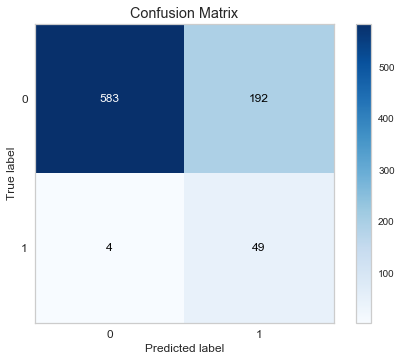

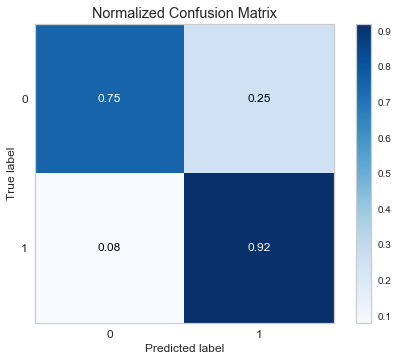

In [427]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True)
plt.show()

In [428]:
# Summary report, we should focus on recall and weighted f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86       775
           1       0.20      0.92      0.33        53

    accuracy                           0.76       828
   macro avg       0.60      0.84      0.59       828
weighted avg       0.94      0.76      0.82       828



In [429]:
# log + fea_model2
clf2 = LogisticRegression()
eec2 = EasyEnsembleClassifier(base_estimator=clf2,replacement=False,n_estimators=14,random_state=2)
eec2.fit(X_train[fea_model2], y_train) # choose the features for training and test at the same time
y_pred2 = eec2.predict(X_test[fea_model2])

In [430]:
# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred2, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.21      0.91      0.33        53

    accuracy                           0.77       828
   macro avg       0.60      0.83      0.60       828
weighted avg       0.94      0.77      0.83       828



In [431]:
# log + fea_model3
clf3 = LogisticRegression()
eec3 = EasyEnsembleClassifier(base_estimator=clf3,replacement=True,n_estimators=14,random_state=2)
eec3.fit(X_train[fea_model3], y_train) # choose the features for training and test at the same time
y_pred3 = eec3.predict(X_test[fea_model3])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred3, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       775
           1       0.21      0.96      0.35        53

    accuracy                           0.77       828
   macro avg       0.60      0.86      0.61       828
weighted avg       0.95      0.77      0.83       828



In [432]:
# log_std + fea_model4
clf4 = LogisticRegression()
eec4 = EasyEnsembleClassifier(base_estimator=clf4,replacement=False,n_estimators=14,random_state=2)
eec4.fit(X_train_std[fea_model4], y_train) # choose the features for training and test at the same time
y_pred4 = eec4.predict(X_test_std[fea_model4])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred4, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       775
           1       0.19      0.91      0.32        53

    accuracy                           0.75       828
   macro avg       0.59      0.82      0.58       828
weighted avg       0.94      0.75      0.82       828



In [433]:
# log_std + fea_model5
clf5 = LogisticRegression()
eec5 = EasyEnsembleClassifier(base_estimator=clf5,replacement=False,n_estimators=14,random_state=2)
eec5.fit(X_train_std[fea_model5], y_train) # choose the features for training and test at the same time
y_pred5 = eec5.predict(X_test_std[fea_model5])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred5, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86       775
           1       0.20      0.92      0.33        53

    accuracy                           0.76       828
   macro avg       0.60      0.84      0.60       828
weighted avg       0.94      0.76      0.82       828



In [434]:
# log_std + fea_model6
clf6 = LogisticRegression()
eec6 = EasyEnsembleClassifier(base_estimator=clf6,replacement=False,n_estimators=14,random_state=2)
eec6.fit(X_train_std[fea_model6], y_train) # choose the features for training and test at the same time
y_pred6 = eec6.predict(X_test_std[fea_model6])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred6, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86       775
           1       0.20      0.92      0.33        53

    accuracy                           0.76       828
   macro avg       0.60      0.84      0.59       828
weighted avg       0.94      0.76      0.82       828



In [435]:
# log_norm + fea_model7
clf7 = LogisticRegression()
eec7 = EasyEnsembleClassifier(base_estimator=clf7,replacement=False,n_estimators=14,random_state=2)
eec7.fit(X_train_norm[fea_model7], y_train) # choose the features for training and test at the same time
y_pred7 = eec7.predict(X_test_norm[fea_model7])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred7, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86       775
           1       0.21      0.94      0.34        53

    accuracy                           0.76       828
   macro avg       0.60      0.85      0.60       828
weighted avg       0.94      0.76      0.82       828



In [436]:
# log_norm + fea_model8
clf8 = LogisticRegression()
eec8 = EasyEnsembleClassifier(base_estimator=clf8,replacement=False,n_estimators=14,random_state=2)
eec8.fit(X_train_norm[fea_model8], y_train) # choose the features for training and test at the same time
y_pred8 = eec8.predict(X_test_norm[fea_model8])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred8, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       775
           1       0.22      0.94      0.35        53

    accuracy                           0.78       828
   macro avg       0.61      0.86      0.61       828
weighted avg       0.95      0.78      0.83       828



In [437]:
# log_norm + fea_model9
clf9 = LogisticRegression()
eec9 = EasyEnsembleClassifier(base_estimator=clf9,replacement=False,n_estimators=14,random_state=2)
eec9.fit(X_train_norm[fea_model9], y_train) # choose the features for training and test at the same time
y_pred9 = eec9.predict(X_test_norm[fea_model9])

# Summary report, we should focus on recall and weighted f1-score
print(classification_report(y_test, y_pred9, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       775
           1       0.22      0.94      0.36        53

    accuracy                           0.78       828
   macro avg       0.61      0.86      0.61       828
weighted avg       0.95      0.78      0.84       828



# Compare Three Better Models

In [ ]:
# it is concluded that clf3,8,9 are better than other model, 
# since they have higher 'wighted f1-score' and 'recall'
# so we only foucs on comparing the three models 

In [438]:
# get the probabilities
y_pred_prob3 = eec3.predict_proba(X_test[fea_model3])
y_pred_prob8 = eec8.predict_proba(X_test_norm[fea_model8])
y_pred_prob9 = eec9.predict_proba(X_test_norm[fea_model9]) 

In [439]:
# only get CKD=1 probabilities
prob3=eec3.predict_proba(X_test_norm[fea_model3])[::,1]
prob8=eec8.predict_proba(X_test_norm[fea_model8])[::,1]
prob9=eec9.predict_proba(X_test_norm[fea_model9])[::,1]

In [440]:
# ROC
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['fpr','tpr','auc'])
probs=[prob3,prob8,prob9]
for prob in probs:        
    fpr, tpr, _ = roc_curve(y_test,  prob)
    auc = roc_auc_score(y_test, prob)
    
    result_table = result_table.append({'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [441]:
result_table.index=['eec_log_fea3','eec_log_norm_fea8','eec_log_norm_fea9']
result_table

,fpr,tpr,auc
eec_log_fea3,"[0.0, 0.0012903225806451613, 0.001290322580645...","[0.0, 0.0, 0.07547169811320754, 0.075471698113...",0.915752
eec_log_norm_fea8,"[0.0, 0.0012903225806451613, 0.001290322580645...","[0.0, 0.0, 0.05660377358490566, 0.056603773584...",0.916421
eec_log_norm_fea9,"[0.0, 0.0012903225806451613, 0.001290322580645...","[0.0, 0.0, 0.07547169811320754, 0.075471698113...",0.918357


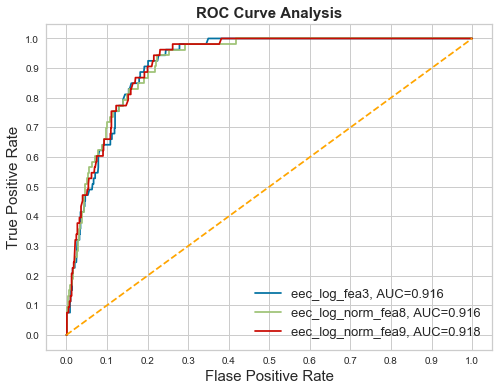

In [442]:
# plot ROC
# eec9 is slighly better than the other two models, we probabaly choose eec9
# However, if we want to have a 100% recall, eec3 is better than other two
# since it has the lowest FPR when the recall is 100% 
# in this case, we choose the eec since it has the highest AUC
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [369]:
y_score3=eec3.decision_function(X_test[fea_model3])
y_score8=eec8.decision_function(X_test[fea_model8])
y_score9=eec9.decision_function(X_test[fea_model9])

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import pylab as pl

precisions = []
recalls = []
average_precisions=[]
y_scores=[y_score3,y_score8,y_score9]
for y_score in y_scores:
    precision, recall, _= precision_recall_curve(y_test,y_score)
    precisions.append(precision)
    recalls.append(recall)
# Plot Precision-Recall curve
pl.clf()
pl.plot(recalls, precisions, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.legend(loc="lower left")
pl.show()

In [ ]:
# Plot Precision-Recall curve
pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
pl.legend(loc="lower left")
pl.show()

# Model interpretation

In [295]:
# get the coef of each features
coefs = []
for pipeline in eec9.estimators_:
    coefs.append(pipeline[1].coef_)
coefs = np.array(coefs).mean(axis=0)
coefs

array([[0.67519141, 0.73521228, 0.93683174, 4.12592714, 0.59355885,
        0.873273  , 0.25929036]])

In [296]:
# it seems that 'Unmarried' has a minor effect, mw can try to remove it
pd.DataFrame({'features':fea_model9,'coef':list(coefs.ravel())})

,features,coef
0,PVD,0.675191
1,Diabetes,0.735212
2,Hypertension,0.936832
3,Age,4.125927
4,Racegrpwhite,0.593559
5,CVD,0.873273
6,Unmarried,0.259290


In [444]:
# choose 6 features PVD,Diabetes,Hypertension,Age,Racegrpwhite,CVD,
useful_fea=['PVD','Diabetes','Hypertension','Age','Racegrpwhite','CVD']

In [448]:
# remove 'Unmarried to see the performance', it is still very good
eec9.fit(X_train_norm[useful_fea], y_train) 
pred = eec.predict(X_test_norm[useful_fea])
print(classification_report(y_test, pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.21      0.92      0.34        53

    accuracy                           0.77       828
   macro avg       0.60      0.84      0.60       828
weighted avg       0.94      0.77      0.83       828



In [ ]:
# get the prob of six features
prob_final=eec9.predict_proba(X_test_norm[useful_fea])[::,1]

In [476]:
#roc 
probs=[prob3,prob8,prob9,prob_final]
roc_table=pd.DataFrame(columns=['tpr','fpr','auc'])

for prob in probs:
    fpr,tpr,_=roc_curve(y_test,prob)
    auc=roc_auc_score(y_test,prob)
    roc_table=roc_table.append({'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
    roc_table.index=['log_fea3','log_norm_fea8','log_norm_fea9','log_norm_fea_final']

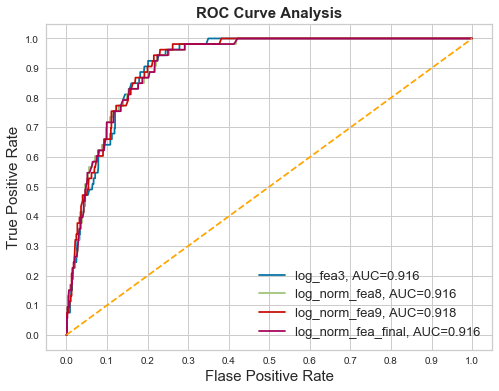

In [479]:
# plot roc
# still get 0.916 auc
fig = plt.figure(figsize=(8,6))

for i in roc_table.index:
    plt.plot(roc_table.loc[i]['fpr'], 
             roc_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, roc_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Conculsion

In [452]:
# get the average coefficient of each six features
coefs = []
for pipeline in eec9.estimators_:
    coefs.append(pipeline[1].coef_)
coefs = np.array(coefs).mean(axis=0)
coefs

array([[0.68886623, 0.73287664, 0.92574474, 4.18550776, 0.55656243,
        0.86853706]])

In [453]:
pd.DataFrame({'features':useful_fea,'coef':list(coefs.ravel())})

,features,coef
0,PVD,0.688866
1,Diabetes,0.732877
2,Hypertension,0.925745
3,Age,4.185508
4,Racegrpwhite,0.556562
5,CVD,0.868537


In [454]:
# get the average intercept
intercepts = []
for pipeline in eec9.estimators_:
    intercepts.append(pipeline[1].intercept_)
intercepts = np.array(intercepts).mean(axis=0)
print(intercepts)

[-4.20893734]


In [ ]:
#Formular intepretation
# ln(p/1-p)= -4.20893734 + PVD * 0.68886623 + Diabetes * 0.73287664 + Hypertension * 0.92574474 
#                                                                   + Age(Log+Norm) * 4.18550776  
#                                                                    + Racegrpwhite * 0.55656243 
#                                                                     + CVD * 0.86853706

In [ ]:
# install yellowbrick packge if you don't have it
pip install yellowbrick

/Users/qiqintian/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  


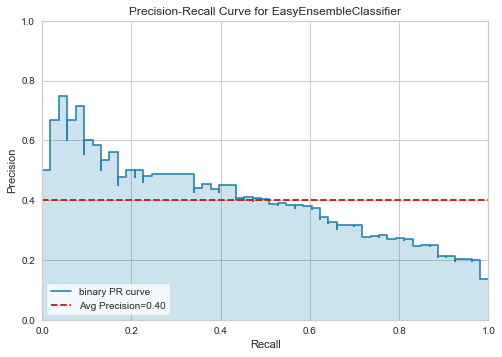

In [451]:
# plot PRC Curve for different business application depending on different needs
# for keeping a balance btween precision and recall
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(eec9)
viz.fit(X_train_norm[useful_fea], y_train)
viz.score(X_test[useful_fea], y_test)
viz.show()